<h1 style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Monkeypox Analysis</h1>


Monkeypox is an infectious viral disease that can occur in humans and some other animals. The disease is caused by monkeypox virus, a zoonotic virus in the genus Orthopoxvirus. An ongoing outbreak of this viral disease monkeypox was confirmed in May 2022, beginning with a cluster of cases found in the United Kingdom. The first confirmed case was traced to an individual with travel links to Nigeria (where the disease is endemic) and was detected on 6 May 2022, although it has been suggested that cases were already spreading in the previous months. From 18 May onwards, cases were reported from an increasing number of countries and regions, predominantly in Europe, but also in North and South America, Asia, Africa and Australia. As of 27 June, the World Health Organization has declared this an **"Evolving Health Threat"** rather than a Public Health Emergency of International Concern (PHEIC).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</h1>

**Monkey_Pox_Cases_Worldwide :** This dataset contains a tally of confirmed and suspected cases in all the countries.

**Worldwide_Case_Detection_Timeline :** This dataset contains the timeline for confirmed cases w.r.t. date time, it also contains some other details on every case that is being reported.

**Daily_Country_Wise_Conformed_Cases :** This dataset contains the daily number of confirmed cases for all the countries where the virus has entered. 

In [2]:
case = pd.read_csv("../input/monkeypox-dataset-daily-updated/Monkey_Pox_Cases_Worldwide.csv")
case_timeline =pd.read_csv("../input/monkeypox-dataset-daily-updated/Worldwide_Case_Detection_Timeline.csv")
case_country = pd.read_csv("../input/monkeypox-dataset-daily-updated/Daily_Country_Wise_Confirmed_Cases.csv")

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Basic Exploration</h1>
<br>
Let's have a glimpse of these datasets.

In [3]:
print(f"Shape of Case Dataset : {case.shape}")
print(f"\n\nGlimpse of Case Dataset :\n")
case.head()

Shape of Case Dataset : (105, 6)


Glimpse of Case Dataset :



,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,2325.0,0.0,5.0,2.0,7.0
1,Portugal,633.0,0.0,0.0,0.0,34.0
2,Spain,3738.0,0.0,11.0,2.0,0.0
3,United States,4630.0,0.0,4.0,39.0,6.0
4,Canada,744.0,9.0,1.0,2.0,0.0


In [4]:
print(f"Informations of Case Dataset :\n")
print(case.info())


Informations of Case Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             105 non-null    object 
 1   Confirmed_Cases     105 non-null    float64
 2   Suspected_Cases     105 non-null    float64
 3   Hospitalized        105 non-null    float64
 4   Travel_History_Yes  105 non-null    float64
 5   Travel_History_No   105 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.0+ KB
None


<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Summary of Dataset</h1>

In [5]:
print(f"Summary of Case Dataset :\n")
case.describe().T

Summary of Case Dataset :



,count,mean,std,min,25%,50%,75%,max
Confirmed_Cases,105.0,201.190476,690.697350,0.0,1.0,3.0,37.0,4630.0
Suspected_Cases,105.0,15.990476,135.108254,0.0,0.0,0.0,0.0,1369.0
Hospitalized,105.0,1.085714,2.896000,0.0,0.0,0.0,1.0,18.0
Travel_History_Yes,105.0,2.133333,5.044164,0.0,0.0,1.0,2.0,39.0
Travel_History_No,105.0,0.761905,3.771155,0.0,0.0,0.0,0.0,34.0


In [6]:
case.describe(include=object).T

,count,unique,top,freq
Country,105,105,England,1


In [7]:
case.isna().sum().to_frame().T

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,0,0,0,0,0,0


Here, we can see there is **no null value** exists in this dataset. All countable values are in **float** datatype. Let's convert them into **int** datatype for efficient calculation and representation. Before that let's initialize the visualization style and custom pallete for visualization.

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Custom Palette For Visualization</h1>

In [9]:
sns.set_style("whitegrid")
sns.set_context("poster",font_scale = .7)

palette = ["#071e22","#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

# sns.palplot(sns.color_palette(palette))
# plt.show()

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Digging Deeper</h1>

In [10]:
print(case["Country"].shape)
print(f'\n There are {len(case["Country"].unique())} contries enlisted here.\n')
case["Country"].unique()

(105,)

 There are 105 contries enlisted here.



array(['England', 'Portugal', 'Spain', 'United States', 'Canada',
       'Sweden', 'Italy', 'France', 'Belgium', 'Australia', 'Germany',
       'Netherlands', 'Israel', 'Switzerland', 'Greece', 'Austria',
       'Argentina', 'Denmark', 'Morocco', 'Slovenia', 'Scotland',
       'Czech Republic', 'United Arab Emirates', 'Finland', 'Wales',
       'Northern Ireland', 'Sudan', 'Bolivia', 'Iran', 'Ecuador', 'Malta',
       'Ireland', 'Mexico', 'Pakistan', 'French Guiana', 'Thailand',
       'Peru', 'Brazil', 'Malaysia', 'Hungary', 'Norway', 'Paraguay',
       'Costa Rica', 'Gibraltar', 'Mauritius', 'Haiti', 'Uruguay',
       'Latvia', 'Cayman Islands', 'Kosovo', 'Turkey', 'Bahamas', 'Ghana',
       'India', 'Iceland', 'Poland', 'Bangladesh', 'Uganda', 'Cambodia',
       'Malawi', 'Venezuela', 'Romania', 'Georgia', 'Slovakia',
       'Luxembourg', 'Nepal', 'Chile', 'Serbia', 'Lebanon', 'South Korea',
       'Singapore', 'South Africa', 'Taiwan', 'Colombia', 'Croatia',
       'Bulgaria', 'Som

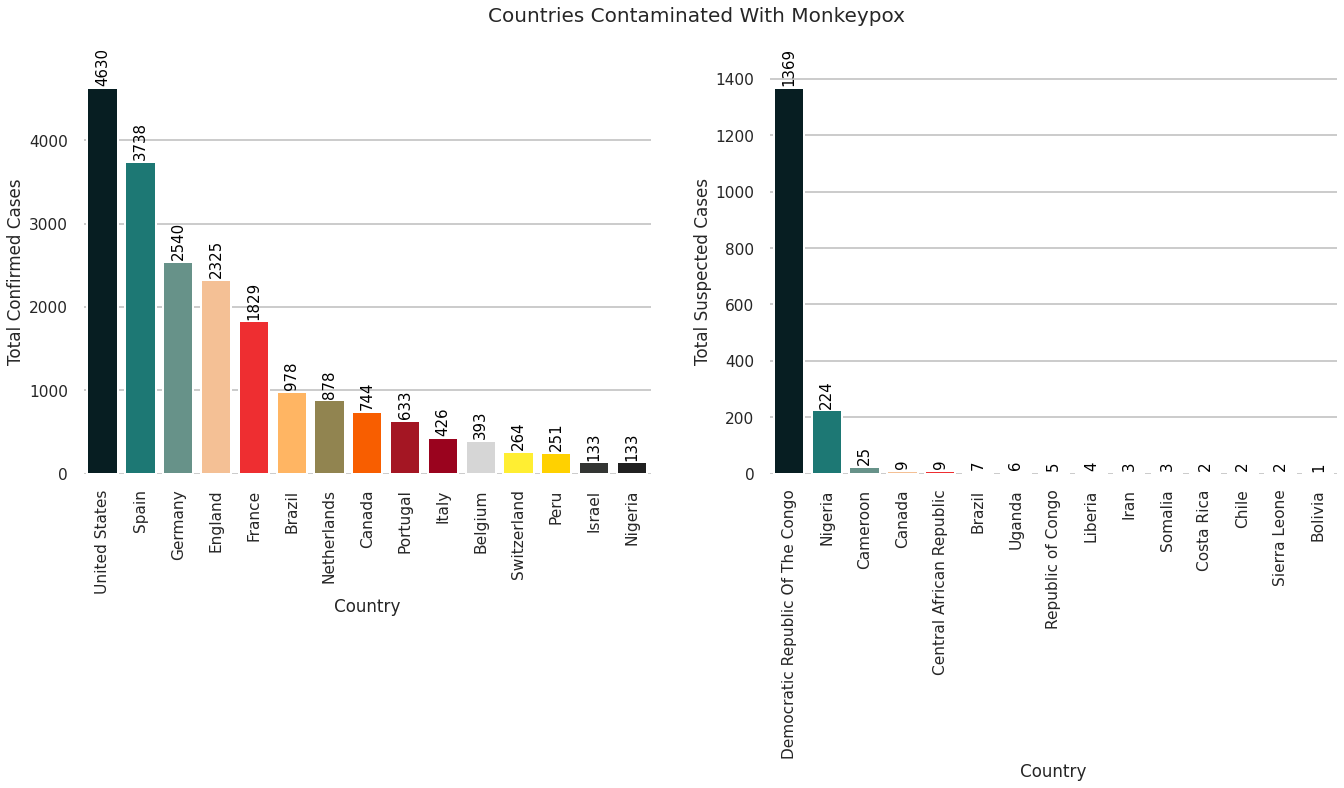

In [11]:
case[["Confirmed_Cases","Suspected_Cases","Hospitalized","Travel_History_Yes","Travel_History_No"]] = case[["Confirmed_Cases","Suspected_Cases","Hospitalized","Travel_History_Yes","Travel_History_No"]].astype("int")
case["Total_Cases"] = case[["Confirmed_Cases","Suspected_Cases"]].sum(axis=1)

case_temp1 = case.sort_values(["Confirmed_Cases"],ascending=False)
case_temp2 = case.sort_values(["Suspected_Cases"],ascending=False)



_, axs = plt.subplots(1,2,figsize=(20,8))
plt.tight_layout(pad=4.0)


sns.barplot(x=case_temp1["Country"][:15],y=case_temp1["Confirmed_Cases"],ax=axs[0],palette=palette, saturation=1)
axs[0].set_ylabel("Total Confirmed Cases")
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 90)
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="edge",padding=2,size=15,color="black",rotation=90)


sns.barplot(x=case_temp2["Country"][:15],y=case_temp2["Suspected_Cases"],ax=axs[1],palette=palette, saturation=1)
axs[1].set_ylabel("Total Suspected Cases")
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 90)
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="edge",padding=2,size=15,color="black",rotation=90)    
    
plt.suptitle("Countries Contaminated With Monkeypox\n",fontsize=20)
sns.despine(left=True, bottom=True)    
plt.show()

We can see that **United States** is leading in confirmed cases followed by **Spain**, **Germany** and others. Meanwhile **Democratic Republic of The Congo** is leading in suspected cases followed by **Nigeria**, **Cameroon** and rest. Top 15 countries have been taken for both confirmed cases and suspected cases for better visualization.

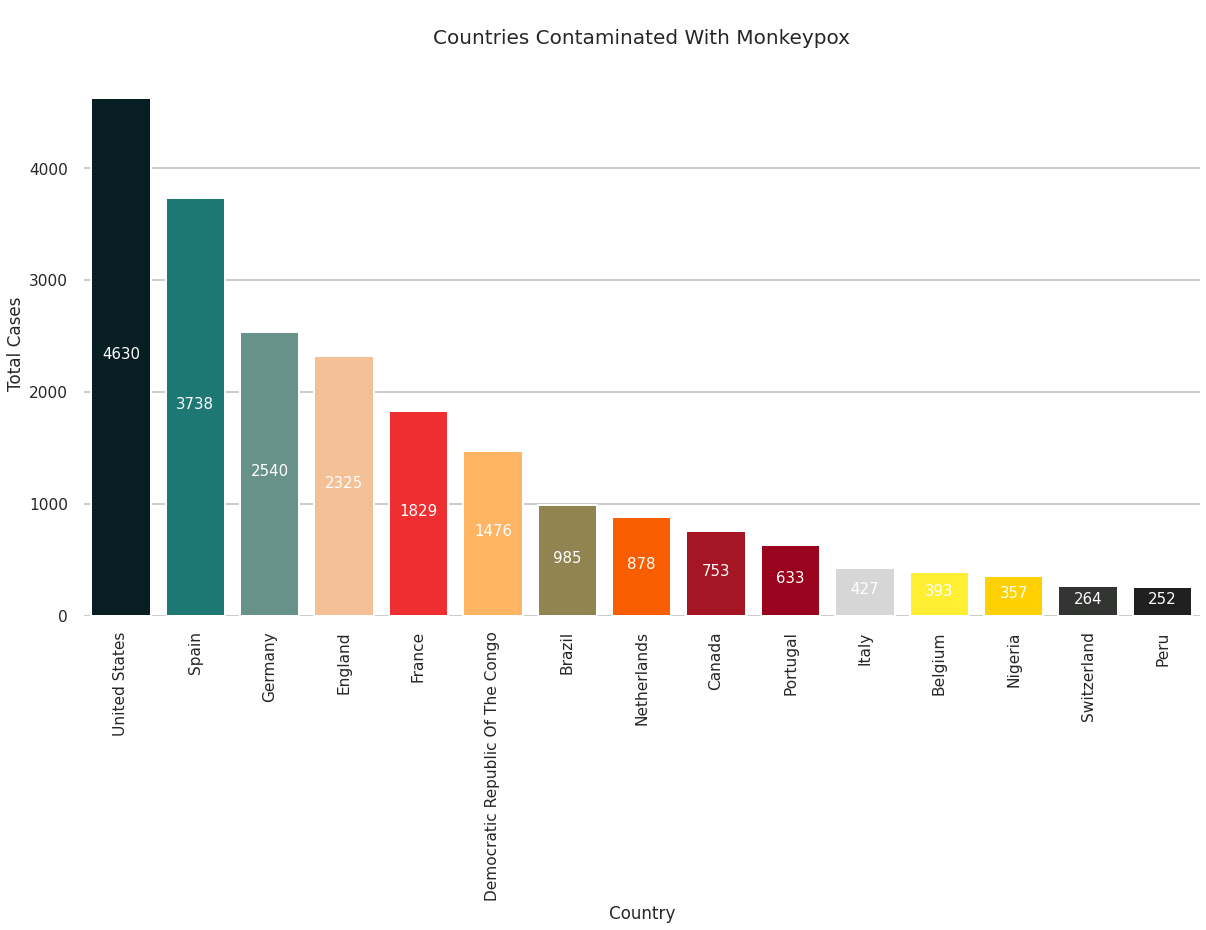

In [12]:
case_temp3 = case.sort_values(["Total_Cases"],ascending=False)

plt.subplots(figsize=(20,10))
p = sns.barplot(x=case_temp3["Country"][:15],y=case_temp3["Total_Cases"],palette=palette, saturation=1)
p.axes.set_title("\nCountries Contaminated With Monkeypox\n",fontsize=20)
plt.ylabel("Total Cases")
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=2,size=15,color="white",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

Though **Democratic Republic of The Congo** is leading in suspected cases, **United States** is leading in overall cases followed by **Spain**, **Germany** and rest. Top 15 countries have been taken for better visualization.

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploring Hospitalized Patient</h1>

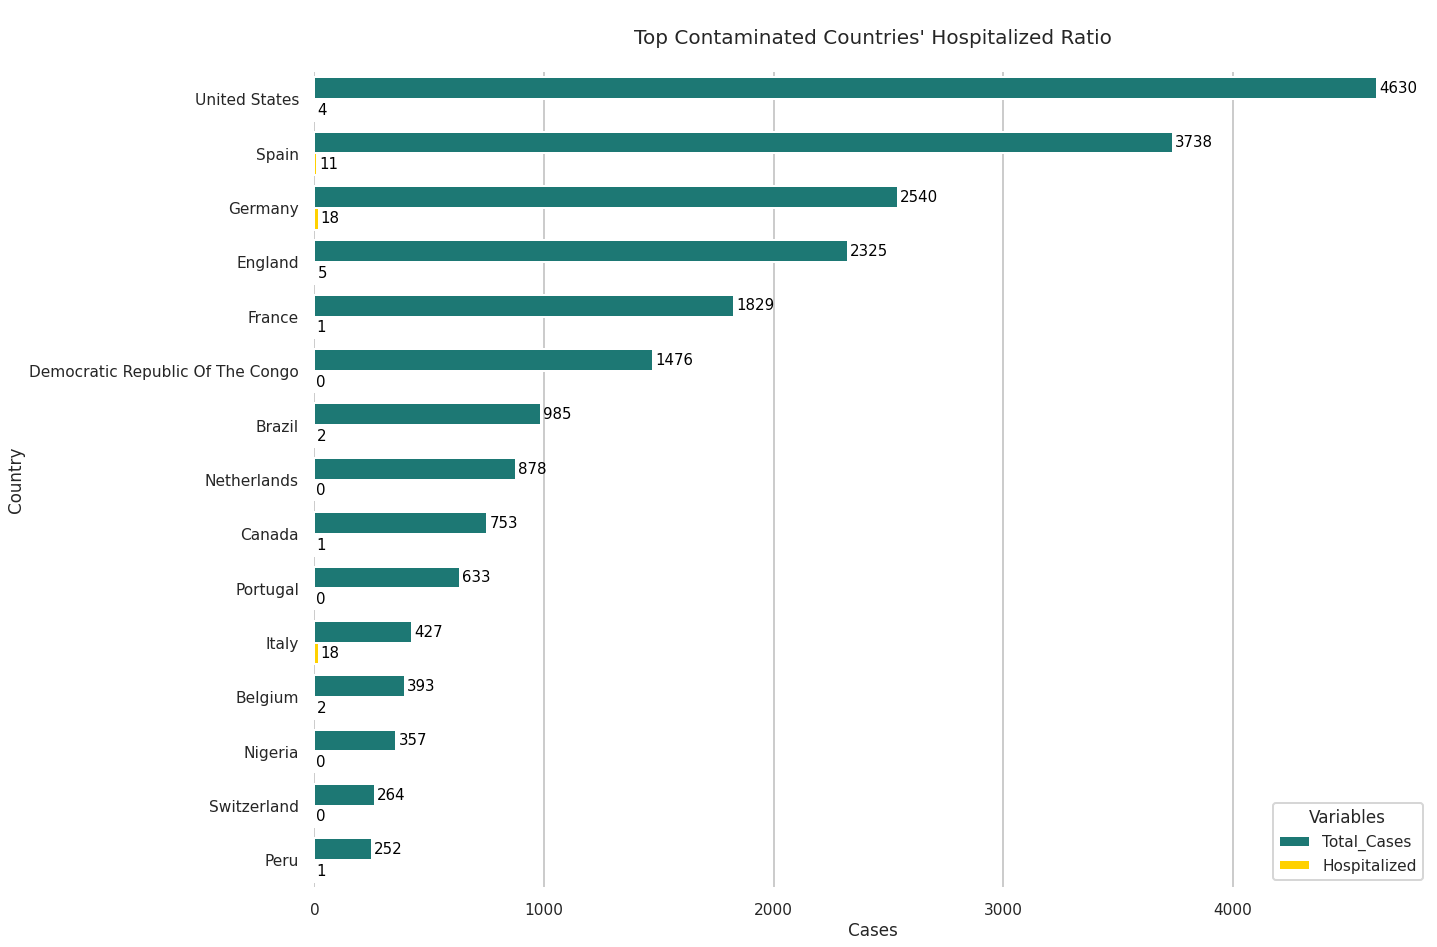

In [13]:
case_temp3_temp = case.sort_values(["Total_Cases"],ascending=False)[:15]

case_temp3_melt = case_temp3_temp.melt(id_vars=['Country'], value_vars=["Total_Cases","Hospitalized"],
                  var_name="Variables", value_name="Values")

plt.subplots(figsize=(20,15))
p = sns.barplot(y=case_temp3_melt["Country"],x=case_temp3_melt["Values"],hue=case_temp3_melt["Variables"],palette=["#1d7874","#ffd100"], saturation=1)
p.axes.set_title("\nTop Contaminated Countries' Hospitalized Ratio\n",fontsize=20)
plt.ylabel("Country")
plt.xlabel("Cases")
plt.xticks(rotation=0)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=2,size=15,color="black",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

We can see **United States** is leading in overall number of cases but the number of hospitalized cases are not high whereas **Germany** is leading in hospitalized cases. Also **Italy** is moving forward with **Germany** in the number of hospitalized cases though the number of overall cases is not too high yet.

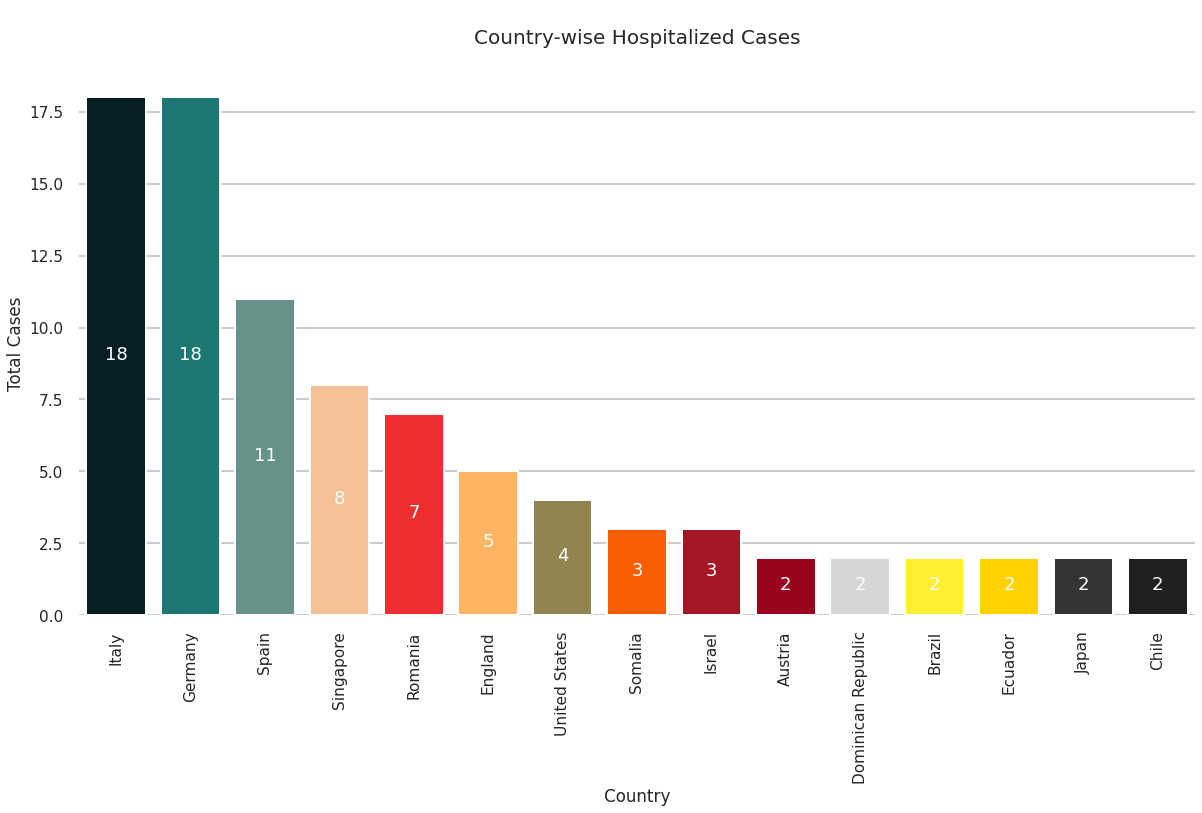

In [14]:
case_temp4 = case.sort_values(["Hospitalized"],ascending=False)

plt.subplots(figsize=(20,10))
p = sns.barplot(x=case_temp4["Country"][:15],y=case_temp4["Hospitalized"],palette=palette, saturation=1)
p.axes.set_title("\nCountry-wise Hospitalized Cases\n",fontsize=20)
plt.ylabel("Total Cases")
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=2,size=18,color="white",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

We can see the number of hospitalized cases are not high yet. **Italy** and **Germany** are leading in hospitalized cases followed by **Spain**, **Singapore** and rest. Top 15 countries have been taken for better visualization.

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploring Travel History</h1>

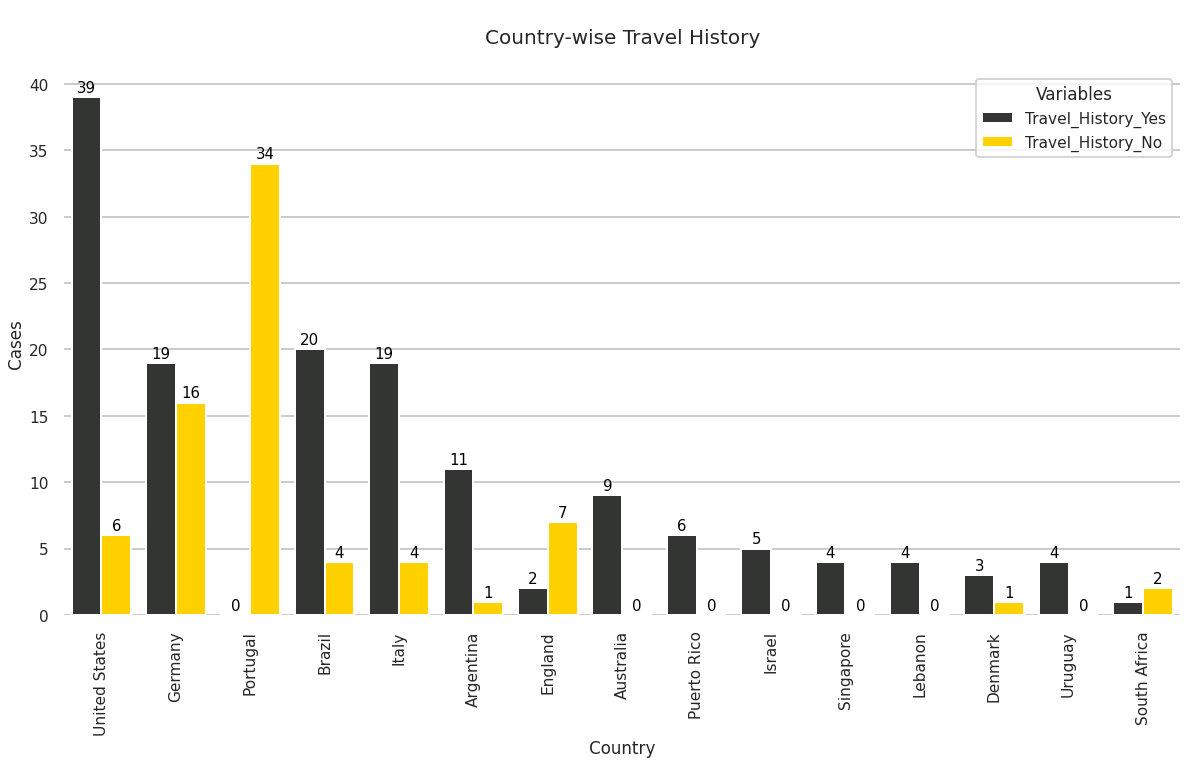

In [15]:
case["Travel_History"] = case[["Travel_History_Yes","Travel_History_No"]].sum(axis=1)
case_temp5 = case.sort_values(["Travel_History"],ascending=False)[:15]

case_temp5_melt = case_temp5.melt(id_vars=['Country'], value_vars=["Travel_History_Yes","Travel_History_No"],
                  var_name="Variables", value_name="Values")

plt.subplots(figsize=(20,10))
p = sns.barplot(x=case_temp5_melt["Country"],y=case_temp5_melt["Values"],hue=case_temp5_melt["Variables"],palette=["#333533","#ffd100"], saturation=1)
p.axes.set_title("\nCountry-wise Travel History\n",fontsize=20)
plt.xlabel("Country")
plt.ylabel("Cases")
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=2,size=15,color="black",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

We can see the travel history is also rich for **United States**, **Germany**, **Italy** and **Brazil**.

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploring Monkeypox Symptoms</h1>

In [18]:
symptoms = case_timeline[["Symptoms"]]
symptoms["Symptoms"].replace(np.nan,"NA",inplace = True)
symptoms = symptoms[symptoms["Symptoms"].isin(["NA"]) == False]
symptoms["Symptoms"] = symptoms["Symptoms"].str.split(", | , | ,|;")
symptoms = symptoms.explode("Symptoms")

symptoms.replace(to_replace = [" rash","rash","rashes","vesicular rash","Rashes","rash on the skin","vasicular rashes","rashes in the groin area","rashes typical of Monkeypox","Rashes in the perianal region","skin rashes","Genital rashes","genital rash"], value = "Rash", inplace=True)
symptoms.replace(to_replace = ["headache","headaches"], value = "Headache", inplace=True)
symptoms.replace(to_replace = ["genital ulcers"], value = "oral and genital ulcers", inplace=True)
symptoms.replace(to_replace = ["muscle pain","muscle ache","back pain","body pains"], value = "Muscle Pain", inplace=True)
symptoms.replace(to_replace = ["Swelling","swelling of lymph nodes","enlarged lymph nodes","Slight swallowing difficulties and an elevated temperature"], value = "swollen lymph nodes", inplace=True)
symptoms.replace(to_replace = ["lesions","skin manifestations","isolated skin lesions","lower abdomen skin lesions","Spots on skin","Three lesions typical of monkeypox"], value = "skin lesions", inplace=True)
symptoms.replace(to_replace = ["fever","mild fever","high fever"], value = "Fever", inplace=True)
symptoms.replace(to_replace = ["fatigue"," myalgia","vesicles"," inguinal adenopathy"], value = ["Fatigue","myalgia","Vesicles","inguinal adenopathy"], inplace=True)
symptoms["Symptoms"] = symptoms["Symptoms"].str.title()

# import warnings
# warnings.filterwarnings("ignore")
print(f'Total amount of unique symptoms : {len(symptoms["Symptoms"].unique())}')
print("\nTop 15 unique symptoms and respective occurances are :\n\n")
symptoms["Symptoms"].value_counts()[:15].to_frame().T

Total amount of unique symptoms : 39

Top 15 unique symptoms and respective occurances are :




,Fever,Rash,Genital Ulcer Lesions,Oral And Genital Ulcers,Skin Lesions,Ulcerative Lesions,Headache,Fatigue,Swollen Lymph Nodes,Muscle Pain,Sore Throat,Myalgia,Vesicles,Chills,Blisters
Symptoms,51,42,30,22,22,21,11,7,6,6,3,3,2,2,2


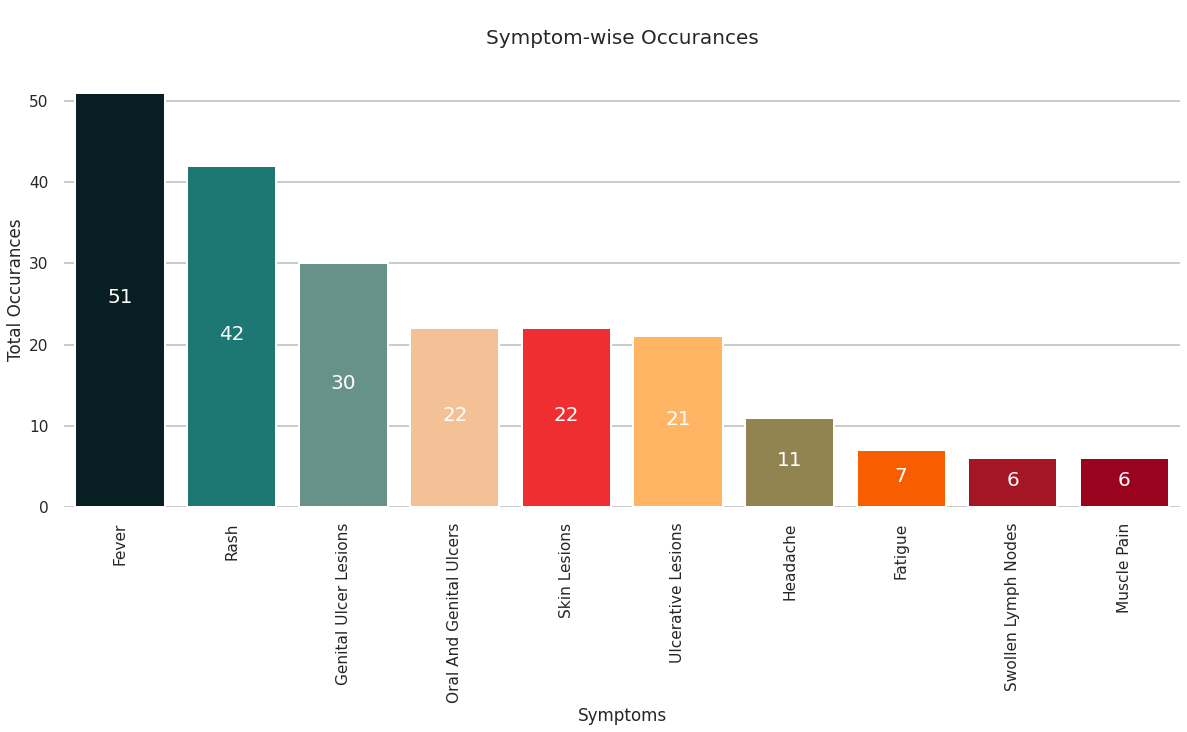

In [19]:
plt.subplots(figsize=(20, 8))
p=sns.countplot(x=symptoms["Symptoms"] ,order=symptoms["Symptoms"].value_counts().index[:10],palette=palette, saturation=1)

p.axes.set_title("\nSymptom-wise Occurances\n",fontsize=20)
plt.ylabel("Total Occurances")
plt.xlabel("Symptoms")
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=2,size=20,color="white",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

We can see among all symptoms **fever**, **genital ulcer lesions**, **rash**, **oral and genital ulcers**, **ulcerative lesions**, **skin lesions** are frequently enlisted. Top 10 frequent symptoms have been taken here for better visualization.

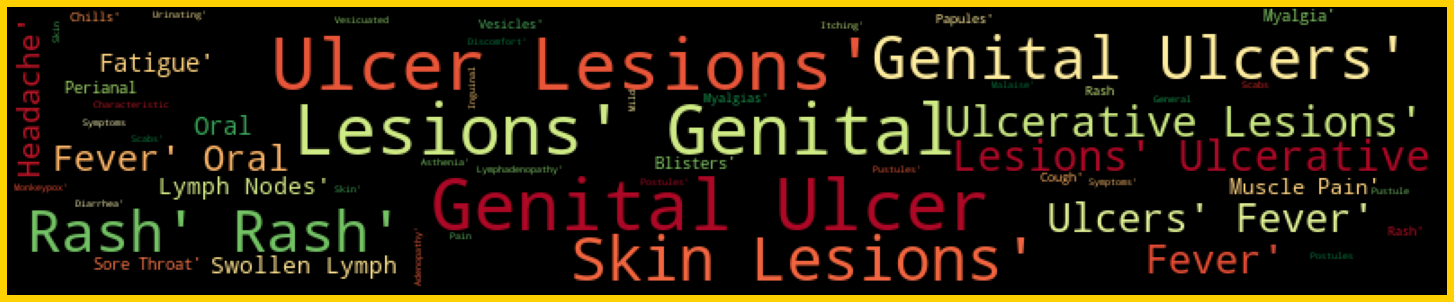

In [40]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 160, 
            background_color ="black",colormap="RdYlGn",max_font_size=40).generate(str(symptoms["Symptoms"].values))

plt.figure(figsize = (20, 8),facecolor= "#ffd100") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploring Case Timeline</h1>

In [41]:
case_country.set_index("Country",inplace = True)
timeline = case_country.T
timeline.head(5)

Country,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,France,...,India,Martinique,Barbados,Qatar,Costa Rica,Thailand,Bermuda,Andorra,Guadeloupe,Japan
2022-01-31,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-17,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-04,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-31,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


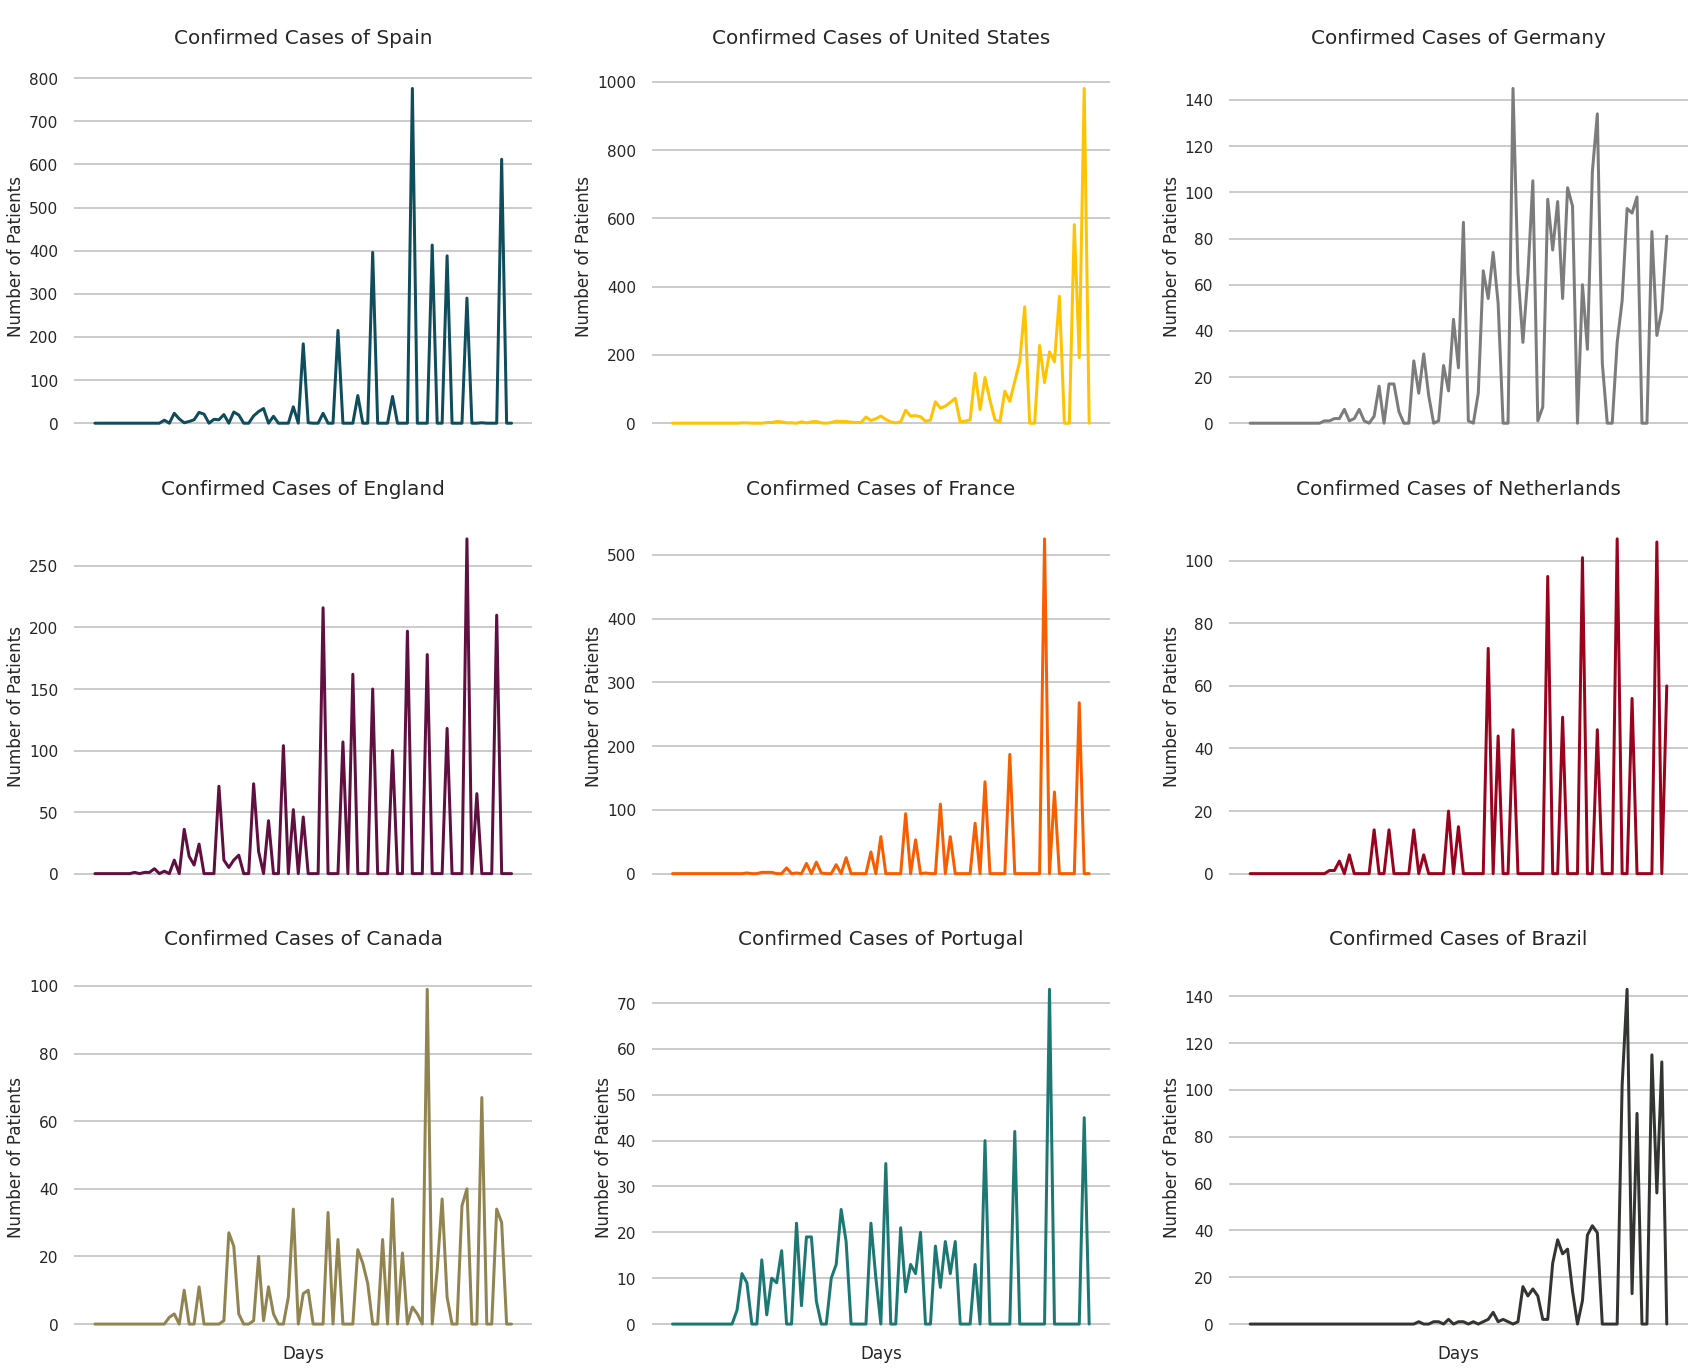

In [42]:
_, axs = plt.subplots(3,3,figsize=(25,20),sharex=True)
plt.tight_layout(pad=4.0)

sns.lineplot(x=timeline.index ,y="Spain",data=timeline,ax=axs[0,0],color="#0f4c5c")
axs[0,0].set_title("\nConfirmed Cases of Spain\n",fontsize=20)
axs[0,0].set_xlabel("Days")
axs[0,0].set_ylabel("Number of Patients")

sns.lineplot(x=timeline.index ,y="United States",data=timeline,ax=axs[0,1],color="#FFC300")
axs[0,1].set_title("\nConfirmed Cases of United States\n",fontsize=20)
axs[0,1].set_xlabel("Days")
axs[0,1].set_ylabel("Number of Patients")

sns.lineplot(x=timeline.index ,y="Germany",data=timeline,ax=axs[0,2],color="#7C7C7C")
axs[0,2].set_title("\nConfirmed Cases of Germany\n",fontsize=20)
axs[0,2].set_xlabel("Days")
axs[0,2].set_ylabel("Number of Patients")

sns.lineplot(x=timeline.index ,y="England",data=timeline,ax=axs[1,0],color="#5f0f40")
axs[1,0].set_title("\nConfirmed Cases of England\n",fontsize=20)
axs[1,0].set_xlabel("Days")
axs[1,0].set_ylabel("Number of Patients")

sns.lineplot(x=timeline.index ,y="France",data=timeline,ax=axs[1,1],color="#f85e00")
axs[1,1].set_title("\nConfirmed Cases of France\n",fontsize=20)
axs[1,1].set_xlabel("Days")
axs[1,1].set_ylabel("Number of Patients")

sns.lineplot(x=timeline.index ,y="Netherlands",data=timeline,ax=axs[1,2],color="#9a031e")
axs[1,2].set_title("\nConfirmed Cases of Netherlands\n",fontsize=20)
axs[1,2].set_xlabel("Days")
axs[1,2].set_ylabel("Number of Patients")

sns.lineplot(x=timeline.index ,y="Canada",data=timeline,ax=axs[2,0],color="#918450")
axs[2,0].set_title("\nConfirmed Cases of Canada\n",fontsize=20)
axs[2,0].set_xlabel("Days")
axs[2,0].set_ylabel("Number of Patients")

sns.lineplot(x=timeline.index ,y="Portugal",data=timeline,ax=axs[2,1],color="#1d7874")
axs[2,1].set_title("\nConfirmed Cases of Portugal\n",fontsize=20)
axs[2,1].set_xlabel("Days")
axs[2,1].set_ylabel("Number of Patients")

sns.lineplot(x=timeline.index ,y="Brazil",data=timeline,ax=axs[2,2],color="#333533")
axs[2,2].set_title("\nConfirmed Cases of Brazil\n",fontsize=20)
axs[2,2].set_xlabel("Days")
axs[2,2].set_ylabel("Number of Patients")
axs[2,2].set_xticks([],minor=False)

sns.despine(left=True, bottom=True)
plt.show()

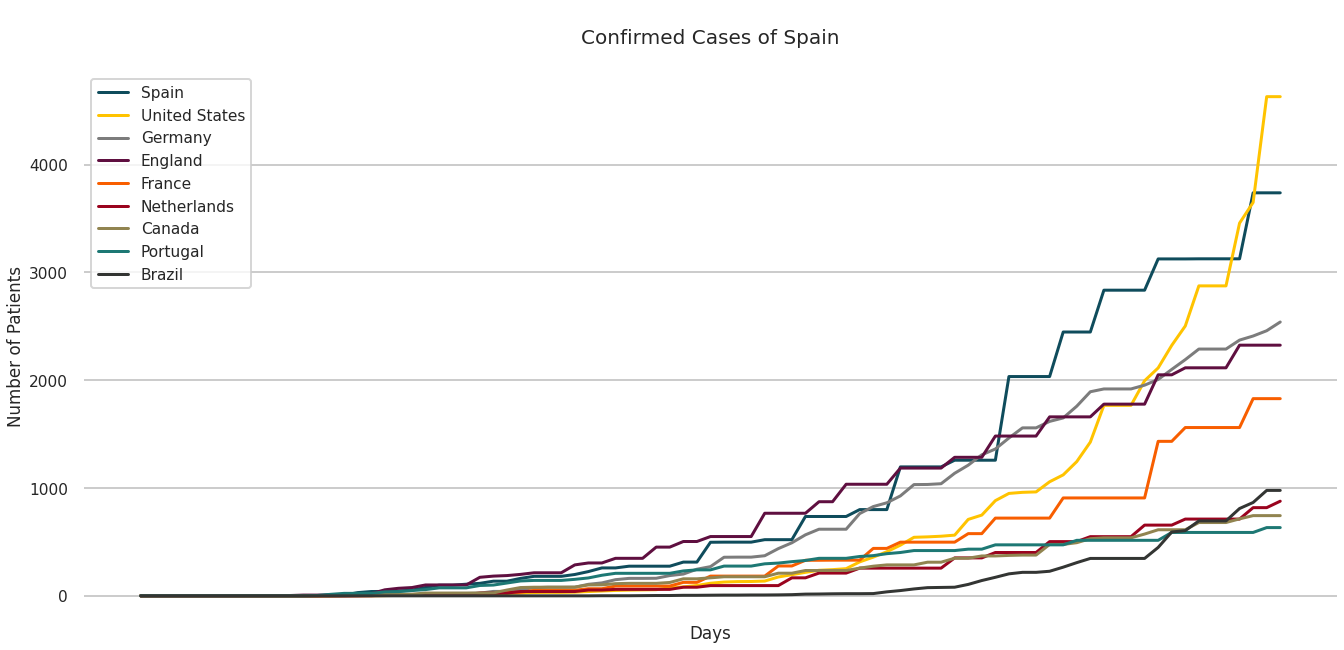

In [43]:
_, axs = plt.subplots(figsize=(20,10))
plt.tight_layout(pad=4.0)

sns.lineplot(x=timeline.index ,y=timeline["Spain"].cumsum(axis=0),data=timeline,ax=axs,color="#0f4c5c")
sns.lineplot(x=timeline.index ,y=timeline["United States"].cumsum(axis=0),data=timeline,ax=axs,color="#FFC300")
sns.lineplot(x=timeline.index ,y=timeline["Germany"].cumsum(axis=0),data=timeline,ax=axs,color="#7C7C7C")
sns.lineplot(x=timeline.index ,y=timeline["England"].cumsum(axis=0),data=timeline,ax=axs,color="#5f0f40")
sns.lineplot(x=timeline.index ,y=timeline["France"].cumsum(axis=0),data=timeline,ax=axs,color="#f85e00")
sns.lineplot(x=timeline.index ,y=timeline["Netherlands"].cumsum(axis=0),data=timeline,ax=axs,color="#9a031e")
sns.lineplot(x=timeline.index ,y=timeline["Canada"].cumsum(axis=0),data=timeline,ax=axs,color="#918450")
sns.lineplot(x=timeline.index ,y=timeline["Portugal"].cumsum(axis=0),data=timeline,ax=axs,color="#1d7874")
sns.lineplot(x=timeline.index ,y=timeline["Brazil"].cumsum(axis=0),data=timeline,ax=axs,color="#333533")

axs.set_title("\nConfirmed Cases of Spain\n",fontsize=20)
axs.set_xlabel("Days")
axs.set_ylabel("Number of Patients")
axs.legend(["Spain","United States","Germany","England","France","Netherlands","Canada","Portugal","Brazil"])
axs.set_xticks([],minor=False)
sns.despine(left=True, bottom=True)
plt.show()

We can see the directions of top 9 countries contaminated with monkeypox. All of them are moving upwards gradually leading by **United States** followed by **Spain** and rest. We can say that **tough days are coming** for this countries!!

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Custom Palette For Visualizing Origins</h1>

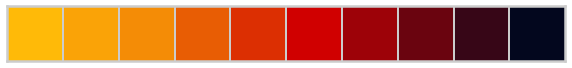

In [44]:
palette_map = ["#FFBA08","#FAA307","#F48C06","#E85D04","#DC2F02","#D00000","#9D0208","#6A040F","#370617","#03071E"]

sns.palplot(sns.color_palette(palette_map))
plt.show()

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploring Monkeypox Origins In North America</h1>

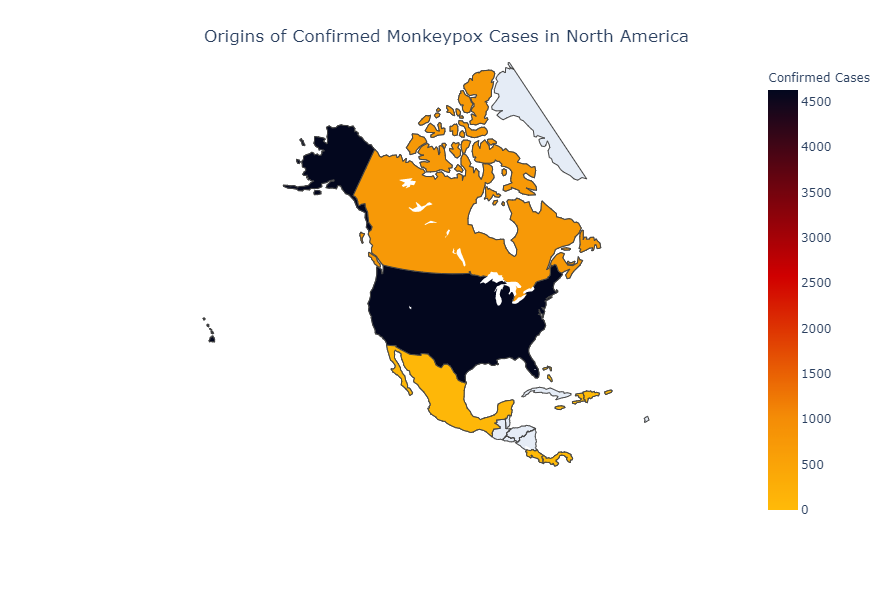

In [45]:
fig = px.choropleth(data_frame = case,
                    locations="Country",locationmode="country names", color="Confirmed_Cases",
                    color_continuous_scale=palette_map,height= 600,scope="north america",
                    labels={"Confirmed_Cases":"Confirmed Cases"})

fig.update_layout(title={"text": "Origins of Confirmed Monkeypox Cases in North America",
                         "y":0.95,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})
fig.show()

We can see **United States** is currently having the highest number of monkeypox cases followed by **Canada** in **North American** region.

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploring Monkeypox Origins In South America</h1>

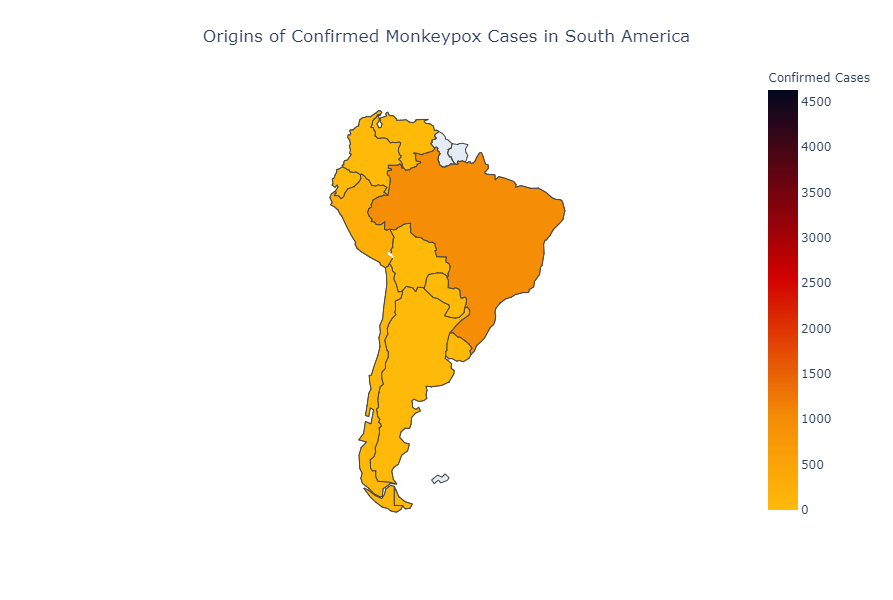

In [46]:
fig = px.choropleth(data_frame = case,
                    locations="Country",locationmode="country names", color="Confirmed_Cases",
                    color_continuous_scale=palette_map,height= 600,scope="south america",
                    labels={"Confirmed_Cases":"Confirmed Cases"})

fig.update_layout(title={"text": "Origins of Confirmed Monkeypox Cases in South America",
                         "y":0.95,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})
fig.show()

We can see **Brazil** is currently having the highest number of monkeypox cases followed by **Peru** in **South American** region.

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploring Monkeypox Origins In Europe</h1>

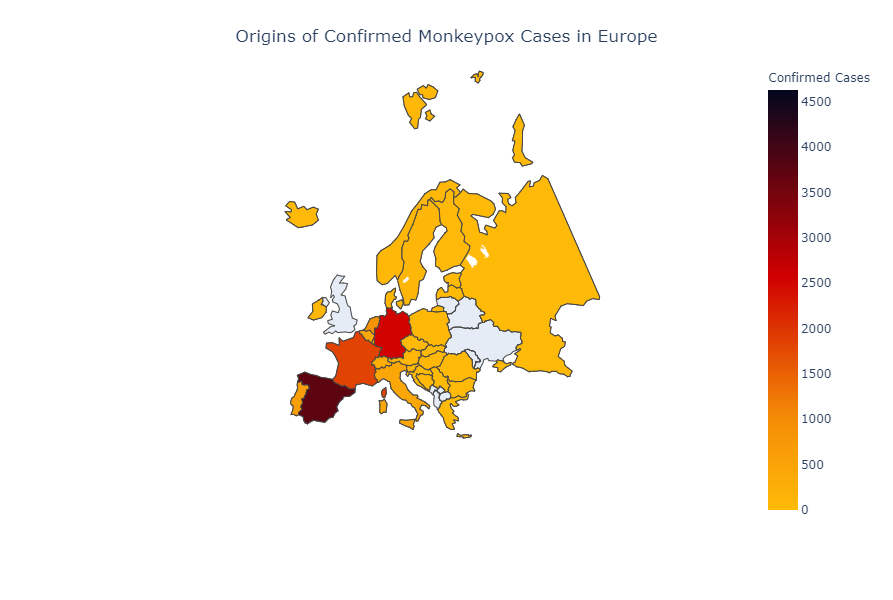

In [47]:
fig = px.choropleth(data_frame = case,
                    locations="Country",locationmode="country names", color="Confirmed_Cases",
                    color_continuous_scale=palette_map,height= 600,scope="europe",
                    labels={"Confirmed_Cases":"Confirmed Cases"})

fig.update_layout(title={"text": "Origins of Confirmed Monkeypox Cases in Europe",
                         "y":0.95,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})
fig.show()

We can see **Spain** is currently having the highest number of monkeypox cases followed by **Germany**, **France** and rest in **European** region.

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploring Monkeypox Origins In Africa</h1>

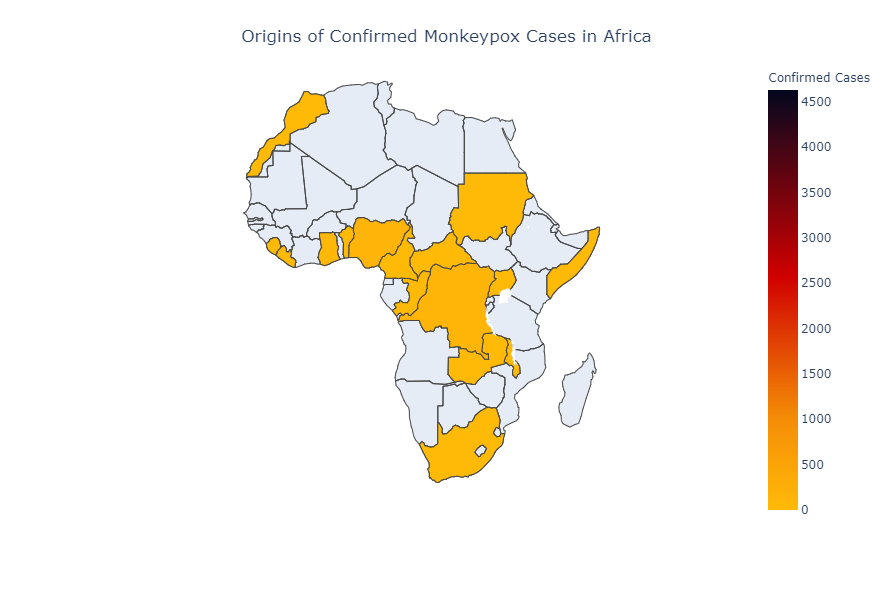

In [48]:
fig = px.choropleth(data_frame = case,
                    locations="Country",locationmode="country names", color="Confirmed_Cases",
                    color_continuous_scale=palette_map,height= 600,scope="africa",
                    labels={"Confirmed_Cases":"Confirmed Cases"})

fig.update_layout(title={"text": "Origins of Confirmed Monkeypox Cases in Africa",
                         "y":0.95,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})
fig.show()

We can see the number of confirmed cases are not too high yet in African region where **Democratic Republic of The Congo** is currently having the highest number of monkeypox cases followed by **Nigeria** and rest in **African** region.

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploring Monkeypox Origins In Asia</h1>

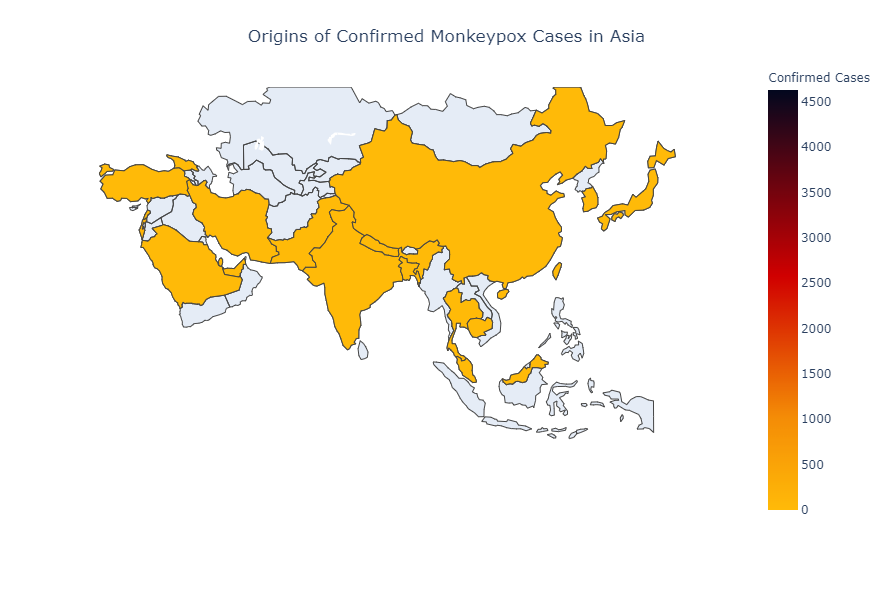

In [49]:
fig = px.choropleth(data_frame = case,
                    locations="Country",locationmode="country names", color="Confirmed_Cases",
                    color_continuous_scale=palette_map,height= 600,scope="asia",
                    labels={"Confirmed_Cases":"Confirmed Cases"})

fig.update_layout(title={"text": "Origins of Confirmed Monkeypox Cases in Asia",
                         "y":0.95,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})
fig.show()

We can see the number of confirmed cases are still **low** in **Asian** region.  

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploring Monkeypox Origins In World Map</h1>

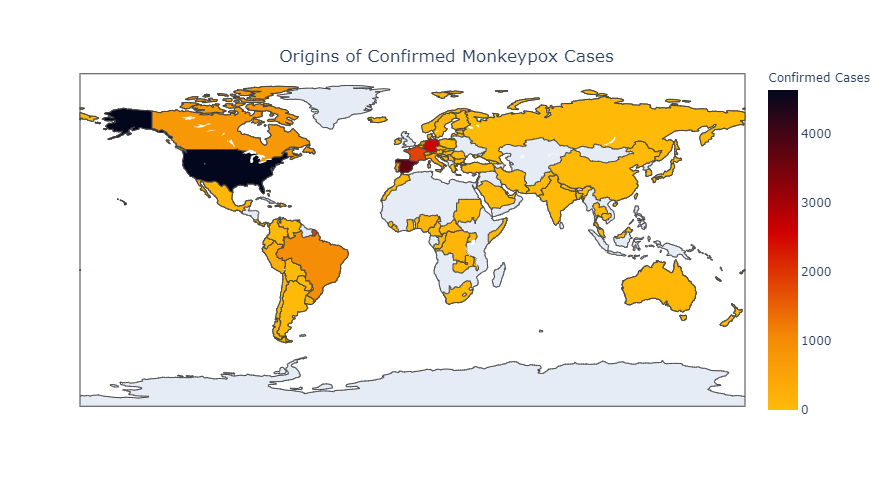

In [50]:
fig = px.choropleth(data_frame = case,
                    locations="Country",locationmode="country names", color="Confirmed_Cases",
                    color_continuous_scale=palette_map,height= 500,scope="world",
                    labels={"Confirmed_Cases":"Confirmed Cases"})

fig.update_layout(title={"text": "Origins of Confirmed Monkeypox Cases",
                         "y":0.9,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})
fig.show()

<h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Custom Palette For Visualizing Correlation</h1>

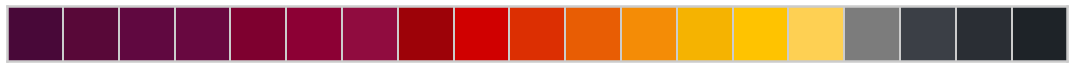

In [51]:
palette_cmap = ["#480838","#580838","#600840","#680840","#7e002f","#8c0034","#900C3F","#9D0208","#D00000","#DC2F02","#E85D04","#F48C06","#F5B301","#FFC300","#FED053","#7C7C7C","#3B3F46","#2A2E34","#1E2328"]

sns.palplot(sns.color_palette(palette_cmap))
plt.show()

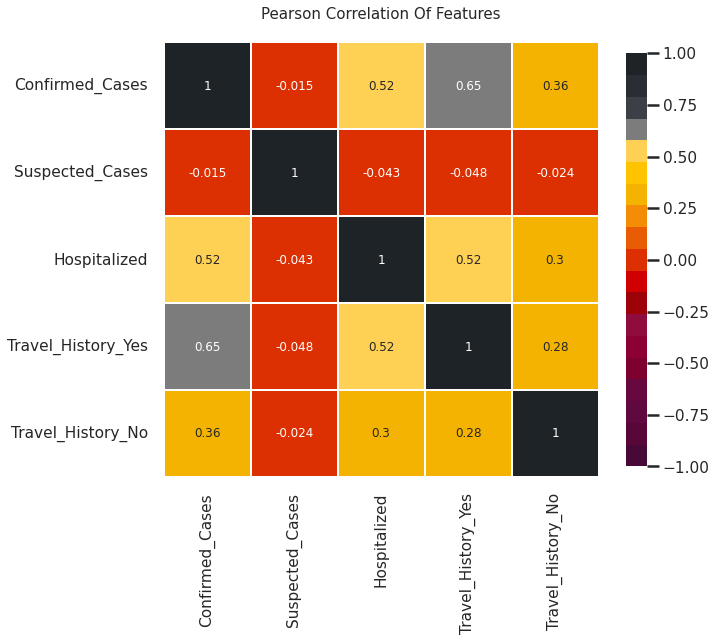

In [52]:
plt.subplots(figsize =(10, 8))

sns.heatmap(case.drop(columns=["Country","Total_Cases","Travel_History"]).corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.95), 
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", size=15)
plt.xticks(rotation=90)
plt.show()

We can see that **people with travel history** have a **positive correlation** with the **confirmed cases** and **hospitalization**!!


<h1 style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank You</h1>